In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

# Load dataset (path works automatically in Kaggle Notebooks)
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Quick checks
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Dataset shape and column names
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Check null values
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head())

# Target distribution
print("\nAttrition counts:\n", df['Attrition'].value_counts())


Shape: (1470, 35)

Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Missing values:
 Age                   0
StandardHours         0
NumCompaniesWorked    0
Over18                0
OverTime              0
dtype: int64

Attrition counts:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64


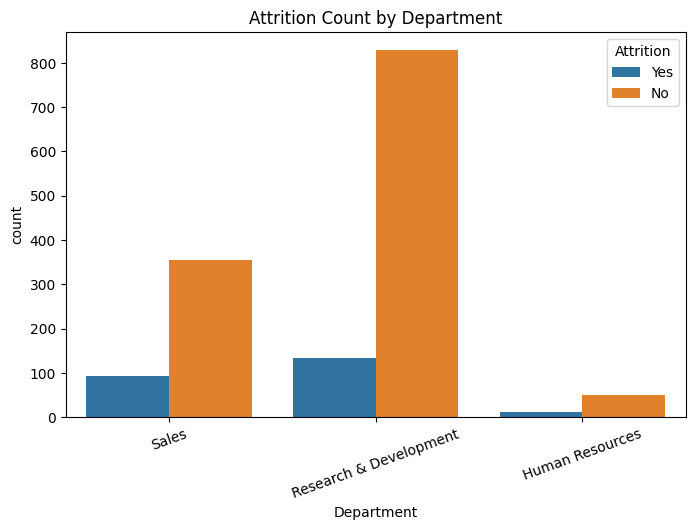

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition Count by Department")
plt.xticks(rotation=20)
plt.show()


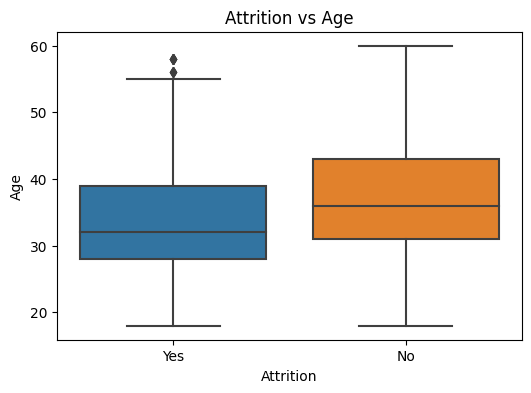

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="Age", data=df)
plt.title("Attrition vs Age")
plt.show()


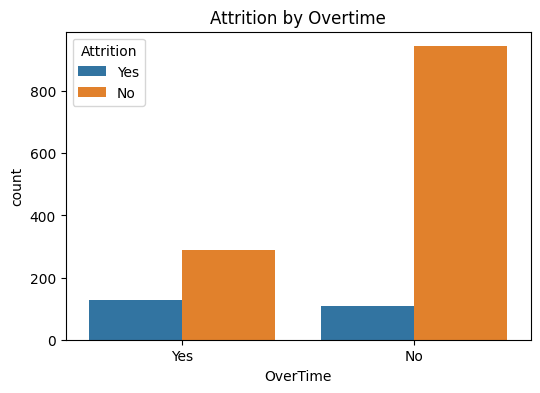

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition by Overtime")
plt.show()


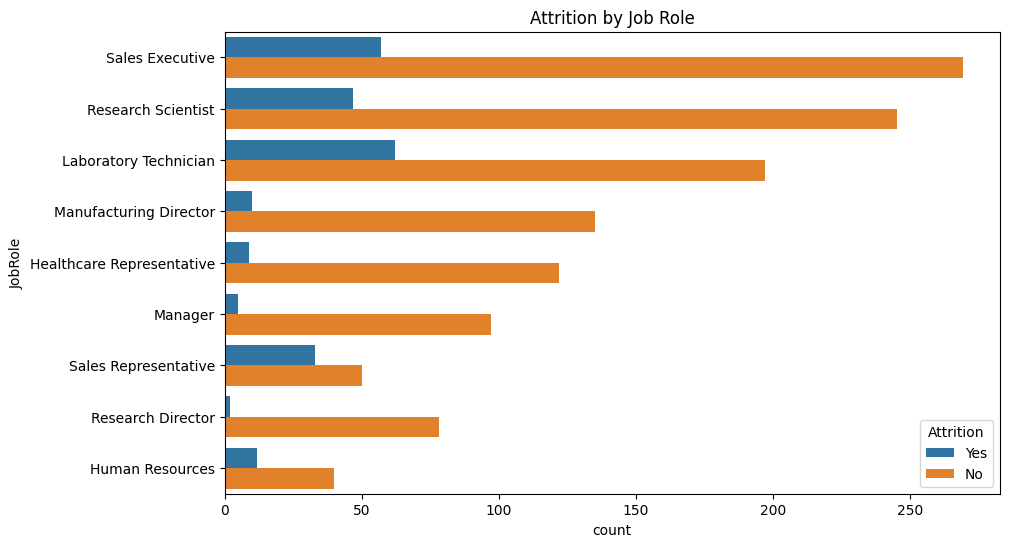

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(y="JobRole", hue="Attrition", data=df)
plt.title("Attrition by Job Role")
plt.show()


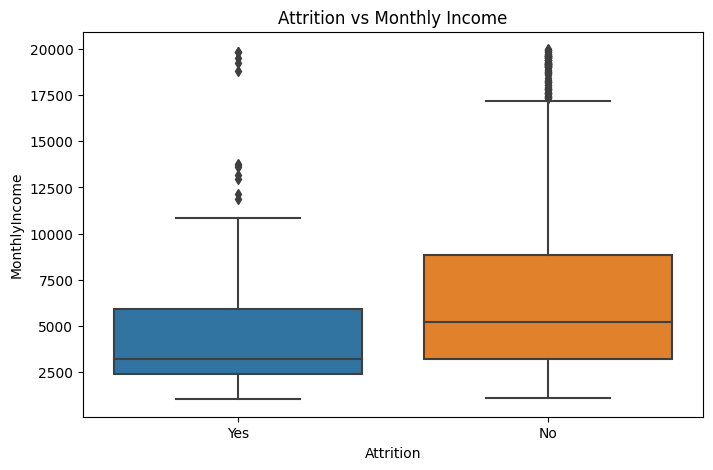

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Attrition vs Monthly Income")
plt.show()


Accuracy : 0.7177
Precision: 0.3085
Recall   : 0.617
F1       : 0.4113
ROC-AUC  : 0.7878

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81       247
           1       0.31      0.62      0.41        47

    accuracy                           0.72       294
   macro avg       0.61      0.68      0.61       294
weighted avg       0.81      0.72      0.75       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


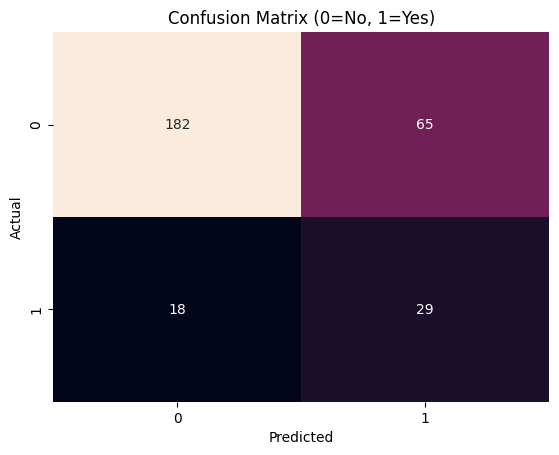


Top 15 features by |coefficient|:



OverTime_Yes                         0.791458
StockOptionLevel                    -0.509492
MaritalStatus_Single                 0.446989
EnvironmentSatisfaction             -0.383518
BusinessTravel_Travel_Frequently     0.348967
Department_Sales                     0.344512
PerformanceRating                    0.320199
JobRole_Laboratory Technician        0.320110
JobSatisfaction                     -0.302833
Department_Research & Development   -0.236350
JobInvolvement                      -0.232860
JobRole_Research Scientist          -0.219521
JobRole_Sales Representative         0.196827
NumCompaniesWorked                   0.175004
EducationField_Marketing             0.171326
dtype: float64

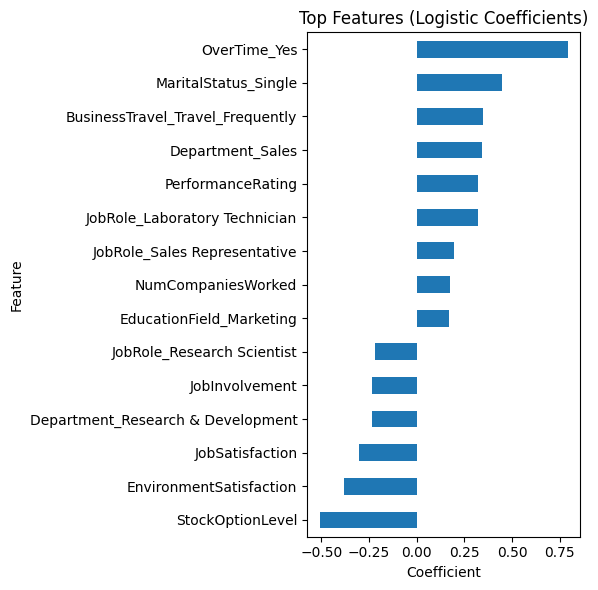

,Age,MonthlyIncome,Department,JobRole,OverTime,Attrition_Actual,Attrition_Prob,Attrition_Pred
1061,24,2033,Sales,Sales Representative,No,0,0.402092,0
891,44,2011,Research & Development,Research Scientist,No,0,0.112450,0
456,31,11557,Sales,Manager,No,0,0.538754,1
922,44,19190,Research & Development,Manager,No,0,0.058051,0
69,36,3388,Research & Development,Research Scientist,Yes,1,0.452896,0


In [16]:
# --- Prep ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Target flag (safe to re-create)
df["Attrition_Flag"] = df["Attrition"].map({"Yes":1, "No":0})

# Drop IDs/constants if present
to_drop = ["EmployeeNumber","EmployeeCount","Over18","StandardHours"]
df_model = df.drop(columns=[c for c in to_drop if c in df.columns])

# X / y
X = df_model.drop(columns=["Attrition","Attrition_Flag"])
y = df_model["Attrition_Flag"]

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# --- Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train (baseline) ---
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=-1)
log_reg.fit(X_train, y_train)

# --- Evaluate ---
y_pred  = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall   :", round(recall_score(y_test, y_pred), 4))
print("F1       :", round(f1_score(y_test, y_pred), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix (quick)
import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix (0=No, 1=Yes)")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

# --- What drives attrition? (top coefficients) ---
import numpy as np
coef = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(key=np.abs, ascending=False)
top15 = coef.head(15)
print("\nTop 15 features by |coefficient|:\n")
display(top15)

plt.figure(figsize=(6,6))
top15.sort_values().plot(kind="barh")
plt.title("Top Features (Logistic Coefficients)")
plt.xlabel("Coefficient"); plt.ylabel("Feature"); plt.tight_layout(); plt.show()

# --- Export for Power BI (scored test set) ---
keep_cols = [c for c in ["Age","MonthlyIncome","Department","JobRole","OverTime"] if c in df.columns]
scored = df.loc[X_test.index, keep_cols].copy()
scored["Attrition_Actual"] = y.loc[X_test.index].values
scored["Attrition_Prob"]   = y_proba
scored["Attrition_Pred"]   = y_pred
scored.head()
